In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import *
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.models import Model
from keras.utils import np_utils
import os,shutil
import random
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
data_path = 'drive/My Drive/Colab Notebooks/Train'

In [4]:
folders = os.listdir(data_path)

In [5]:
print(folders)

['Aerodactyl', 'Dratini', 'Fearow', 'Spearow', 'Pikachu', 'Charmander', 'Bulbasaur', 'Squirtle', 'Meowth', 'Psyduck']


In [6]:
# for f in folders:
#     sub_path = os.path.join(data_path,f)
#     for img in os.listdir(sub_path):
#         img_path = os.path.join(sub_path,img)
#         if img_path[-3:]=='svg':
#             print(img_path)
#             drawing = svg2rlg(img_path)
#             renderPM.drawToFile(drawing, "file.png", fmt="PNG")
#             os.remove(img_path)
#             print(img_path,"has been deleted")

In [7]:
image_data = []
image_labels = []
image_dict = {
    "Aerodactyl":0,  
    "Bulbasaur":1,  
    "Charmander":2, 
    "Dratini":3,  
    "Fearow":4,  
    "Meowth":5,  
    "Pikachu":6,  
    "Psyduck":7,  
    "Spearow":8,  
    "Squirtle":9 
}

In [8]:
for f in folders:
    sub_path = os.path.join(data_path,f)
    print(sub_path,"is in process")
    for img in os.listdir(sub_path):
        img_path = os.path.join(sub_path,img)
        img = image.load_img(img_path,target_size=((224,224)))
        img_arr = image.img_to_array(img)/255.0
        image_data.append(img_arr)
        image_labels.append(image_dict[f])
    print(sub_path,"HAS BEEN PROCESSED")

drive/My Drive/Colab Notebooks/Train/Aerodactyl is in process
drive/My Drive/Colab Notebooks/Train/Aerodactyl HAS BEEN PROCESSED
drive/My Drive/Colab Notebooks/Train/Dratini is in process
drive/My Drive/Colab Notebooks/Train/Dratini HAS BEEN PROCESSED
drive/My Drive/Colab Notebooks/Train/Fearow is in process
drive/My Drive/Colab Notebooks/Train/Fearow HAS BEEN PROCESSED
drive/My Drive/Colab Notebooks/Train/Spearow is in process
drive/My Drive/Colab Notebooks/Train/Spearow HAS BEEN PROCESSED
drive/My Drive/Colab Notebooks/Train/Pikachu is in process


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


drive/My Drive/Colab Notebooks/Train/Pikachu HAS BEEN PROCESSED
drive/My Drive/Colab Notebooks/Train/Charmander is in process
drive/My Drive/Colab Notebooks/Train/Charmander HAS BEEN PROCESSED
drive/My Drive/Colab Notebooks/Train/Bulbasaur is in process
drive/My Drive/Colab Notebooks/Train/Bulbasaur HAS BEEN PROCESSED
drive/My Drive/Colab Notebooks/Train/Squirtle is in process
drive/My Drive/Colab Notebooks/Train/Squirtle HAS BEEN PROCESSED
drive/My Drive/Colab Notebooks/Train/Meowth is in process
drive/My Drive/Colab Notebooks/Train/Meowth HAS BEEN PROCESSED
drive/My Drive/Colab Notebooks/Train/Psyduck is in process
drive/My Drive/Colab Notebooks/Train/Psyduck HAS BEEN PROCESSED


In [9]:
print(len(image_data),len(image_labels))

1645 1645


In [10]:
total = 0
for f in folders:
    path = os.path.join(data_path,f)
    print(f +" "+ str(len(os.listdir(path))))
    total += len(os.listdir(path))
print(total)

Aerodactyl 80
Dratini 98
Fearow 109
Spearow 117
Pikachu 268
Charmander 264
Bulbasaur 255
Squirtle 248
Meowth 63
Psyduck 143
1645


In [11]:
image_labels[:5]

[0, 0, 0, 0, 0]

In [12]:
combined = list(zip(image_data,image_labels))
random.shuffle(combined)
image_data[:],image_labels[:] = zip(*combined)

In [13]:
print(image_labels[:15])

[6, 8, 9, 9, 7, 3, 7, 5, 1, 9, 7, 7, 2, 4, 5]


In [14]:
X_train = np.array(image_data)
y_train = np_utils.to_categorical(np.array(image_labels))

In [15]:
print(X_train.shape,y_train.shape)

(1645, 224, 224, 3) (1645, 10)


In [16]:
base_model = MobileNetV2(include_top=False,weights='imagenet',input_shape=(224,224,3))

9412608/9406464 [==============================] - 1s 0us/step


In [17]:
# base_model.summary()

In [18]:
gap = GlobalAveragePooling2D()(base_model.output)
fc1 = Dense(256,activation='relu')(gap)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(10,activation='softmax')(d1)


In [19]:
model = Model(inputs = base_model.input,outputs = fc2)

In [20]:
# model.summary()

In [21]:
adam = Adam(learning_rate=0.00003)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics = ['accuracy'])

In [22]:
# model.summary()

In [23]:
hist = model.fit(X_train,y_train,batch_size=16,shuffle=True,epochs=15,validation_split=0.20)

Train on 1316 samples, validate on 329 samples
Epoch 1/15
1316/1316 [==============================] - 32s 24ms/step - loss: 2.1386 - accuracy: 0.2796 - val_loss: 1.7884 - val_accuracy: 0.3951
Epoch 2/15
1316/1316 [==============================] - 14s 10ms/step - loss: 1.2949 - accuracy: 0.6011 - val_loss: 1.2970 - val_accuracy: 0.6261
Epoch 3/15
1316/1316 [==============================] - 14s 10ms/step - loss: 0.8351 - accuracy: 0.7584 - val_loss: 0.9681 - val_accuracy: 0.7082
Epoch 4/15
1316/1316 [==============================] - 14s 10ms/step - loss: 0.6234 - accuracy: 0.8191 - val_loss: 0.7880 - val_accuracy: 0.7477
Epoch 5/15
1316/1316 [==============================] - 14s 10ms/step - loss: 0.4237 - accuracy: 0.8807 - val_loss: 0.6369 - val_accuracy: 0.7872
Epoch 6/15
1316/1316 [==============================] - 14s 10ms/step - loss: 0.3354 - accuracy: 0.9179 - val_loss: 0.5552 - val_accuracy: 0.8176
Epoch 7/15
1316/1316 [==============================] - 14s 10ms/step - loss:

In [24]:
h = hist.history

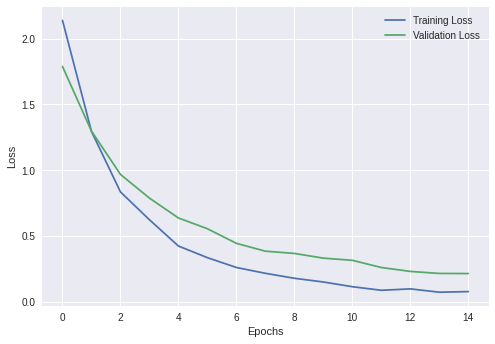

In [25]:
plt.style.use('seaborn')
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

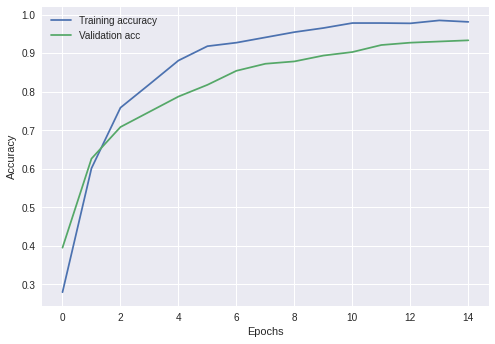

In [26]:
plt.style.use('seaborn')
plt.plot(h['accuracy'],label='Training accuracy')
plt.plot(h['val_accuracy'],label='Validation acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
test_path = '/content/drive/My Drive/Colab Notebooks/Test/images'
sample_sub_path = '/content/drive/My Drive/Colab Notebooks/Test/sample_submission.csv'

In [28]:
import pandas as pd

In [29]:
sample_sub = pd.read_csv(sample_sub_path)

In [30]:
test_image_data = []

In [31]:
for img_path in os.listdir(test_path):
  img_path = os.path.join(test_path,img_path)
  img = image.load_img(img_path,target_size=((224,224)))
  img_arr = image.img_to_array(img)/255.0
  test_image_data.append(img_arr)

In [32]:
X_test = np.array(test_image_data)

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred[0]

array([9.9193585e-01, 1.0409444e-04, 8.6552300e-04, 9.8421134e-04,
       5.9412956e-05, 1.7969412e-04, 2.2966060e-05, 8.7197404e-05,
       5.6760814e-03, 8.4970103e-05], dtype=float32)

In [35]:
Y_ = np.argmax(y_pred,axis = 1)

In [39]:
import pandas as pd

In [40]:
test_labels = []
for test_img in os.listdir(test_path):
    test_labels.append(test_img)

In [42]:
len(test_labels)

187

In [58]:
submission = pd.DataFrame(data = test_labels,columns=['Name'])

In [59]:
submission['Class'] = Y_

In [60]:
submission.to_csv('my_submission.csv',index=False)

In [66]:
test_labels = list(sample_sub['Name'])

In [68]:
test_image_data = []
for img in test_labels:
  img_path = os.path.join(test_path,img)
  img = image.load_img(img_path,target_size=((224,224)))
  img_arr = image.img_to_array(img)/255.0
  test_image_data.append(img_arr)

In [69]:
X_test = np.array(test_image_data)

In [70]:
len(X_test)

187

In [71]:
y_pred = model.predict(X_test)

In [72]:
len(y_pred)

187

In [73]:
Y_ = np.argmax(y_pred,axis = 1)

In [74]:
Y_

array([1, 8, 9, 6, 6, 2, 6, 6, 9, 9, 1, 9, 3, 7, 6, 4, 2, 8, 8, 6, 2, 9,
       9, 7, 1, 0, 0, 7, 2, 7, 8, 6, 9, 8, 8, 7, 8, 2, 0, 8, 1, 7, 0, 8,
       5, 6, 1, 2, 2, 5, 2, 3, 6, 7, 1, 9, 6, 6, 1, 1, 5, 7, 0, 2, 9, 0,
       2, 6, 8, 7, 8, 3, 4, 6, 4, 6, 2, 9, 0, 2, 4, 6, 3, 1, 2, 9, 2, 9,
       6, 1, 7, 5, 1, 6, 1, 6, 5, 6, 6, 2, 6, 9, 9, 6, 1, 7, 2, 2, 1, 9,
       6, 1, 1, 3, 9, 9, 1, 9, 9, 2, 9, 5, 2, 9, 4, 1, 0, 9, 1, 8, 7, 2,
       7, 9, 9, 4, 2, 6, 4, 1, 1, 7, 2, 2, 3, 6, 4, 4, 9, 1, 2, 9, 4, 1,
       1, 2, 6, 1, 0, 2, 1, 4, 9, 3, 2, 6, 1, 7, 9, 1, 2, 9, 7, 9, 6, 0,
       2, 1, 3, 4, 9, 3, 8, 3, 5, 4, 6])

In [78]:
submission = pd.DataFrame(test_labels,columns = ['Name'])

In [79]:
submission['Class'] = Y_

In [80]:
submission

,Name,Class
0,test_32.jpg,1
1,test_147.jpg,8
2,test_171.jpg,9
3,test_114.jpg,6
4,test_162.jpg,6
...,...,...
182,test_150.jpg,8
183,test_72.jpg,3
184,test_95.jpg,5
185,test_88.jpg,4


In [81]:
submission.to_csv('my_sub.csv',index = False)